# **_Reinforcement Learning tools for Auto-Stock Trading_**  

### 1. Importing Necessary Libraries

In [1]:
#Basic Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline

In [2]:
#Finrl utilities
from finrl import config
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import data_split
from finrl.agents.stablebaselines3.models import DRLAgent

C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\exchange_calendars\exchange_calendar.py:2347: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),


In [3]:
#Processing Utilities
import datetime
import itertools


In [4]:
#Make finrl imports accessible
import sys
sys.path.append("../FinRL-Library")

In [5]:
#Setup libraries
from __future__ import annotations
#postponed evaluation of type annotations and evaluation available at runtime

In [6]:
#other imports will be used wherever applicable

In [7]:
#Symbols of BSE SENSEX30 whose data is to be downloaded
# symbols = [
#     'AXISBANK.BO', 'BAJAJ-AUTO.BO', 'BAJFINANCE.BO', 'BAJAJFINSV.BO',
#     'BHARTIARTL.BO', 'DRREDDY.BO', 'HCLTECH.BO', 'JSWSTEEL.BO', 'HDFCBANK.BO',
#     'HINDUNILVR.BO', 'ICICIBANK.BO', 'INDUSINDBK.BO', 'INFY.BO', 'ITC.BO',
#     'KOTAKBANK.BO', 'LT.BO', 'M&M.BO', 'MARUTI.BO', 'NESTLEIND.BO',
#     'NTPC.BO', 'ONGC.BO', 'POWERGRID.BO', 'RELIANCE.BO', 'SBIN.BO',
#     'SUNPHARMA.BO', 'TCS.BO', 'TECHM.BO', 'TITAN.BO', 'ULTRACEMCO.BO','ASIANPAINT.BO'
# ]


In [8]:
#Globally accesible training and trading s/e
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2023-05-01'

In [9]:
#How we downloaded the data
# df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
#                                 end_date = TRADE_END_DATE,
#                                 ticker_list = symbols).fetch_data()

### 2. Loading the Data

In [10]:
df_raw=pd.read_csv('datasets/BSE30.csv')

In [11]:
df_raw.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,90.750000,90.750000,88.550003,48.861801,19140,ASIANPAINT.BO,4
1,2009-01-02,105.800003,109.599998,103.459999,71.914917,4536215,AXISBANK.BO,4
2,2009-01-02,206.050003,210.500000,196.500000,158.413025,52648,BAJAJ-AUTO.BO,4
3,2009-01-02,15.140000,15.800000,14.975000,13.401811,136590,BAJAJFINSV.BO,4
4,2009-01-02,6.660000,6.970000,6.350000,2.746401,274220,BAJFINANCE.BO,4


In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105703 entries, 0 to 105702
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    105703 non-null  object 
 1   open    105703 non-null  float64
 2   high    105703 non-null  float64
 3   low     105703 non-null  float64
 4   close   105703 non-null  float64
 5   volume  105703 non-null  int64  
 6   tic     105703 non-null  object 
 7   day     105703 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.5+ MB


### 3. Preprocessing the data

In [13]:
from finrl.config import INDICATORS
from dataprocessing import FeatureEngineer, load_dataset, data_split, convert_to_datetime

fe = FeatureEngineer(use_technical_indicator=True,
                      tech_indicator_list = INDICATORS,
                      use_vix=False,
                      use_turbulence=True,
                      user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

Successfully added technical indicators


C:\Users\Vansh\Downloads\BTP-2-4-24\dataprocessing.py:236: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_price_pivot = df_price_pivot.pct_change()


Successfully added turbulence index


In [14]:
processed

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,2009-01-02,90.750000,90.750000,88.550003,48.861801,19140,ASIANPAINT.BO,4,0.000000,50.523346,48.068260,100.000000,66.666667,100.000000,48.861801,48.861801,0.000000
1,2009-01-02,105.800003,109.599998,103.459999,71.914917,4536215,AXISBANK.BO,4,0.000000,50.523346,48.068260,100.000000,66.666667,100.000000,71.914917,71.914917,0.000000
2,2009-01-02,206.050003,210.500000,196.500000,158.413025,52648,BAJAJ-AUTO.BO,4,0.000000,50.523346,48.068260,100.000000,66.666667,100.000000,158.413025,158.413025,0.000000
3,2009-01-02,15.140000,15.800000,14.975000,13.401811,136590,BAJAJFINSV.BO,4,0.000000,50.523346,48.068260,100.000000,66.666667,100.000000,13.401811,13.401811,0.000000
4,2009-01-02,6.660000,6.970000,6.350000,2.746401,274220,BAJFINANCE.BO,4,0.000000,50.523346,48.068260,100.000000,66.666667,100.000000,2.746401,2.746401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105698,2023-04-28,981.000000,992.500000,979.250000,986.799988,26056,SUNPHARMA.BO,4,-0.263414,1019.314408,965.265603,50.085294,14.481255,1.567920,983.446670,985.046100,43.069415
105699,2023-04-28,3208.000000,3227.199951,3197.149902,3175.769043,51644,TCS.BO,4,-15.398183,3235.633708,3045.249324,48.649310,67.966063,0.407494,3131.238102,3257.234477,43.069415
105700,2023-04-28,983.000000,1026.650024,982.950012,986.955139,279514,TECHM.BO,4,-22.941437,1102.074200,929.293964,44.970681,-99.119890,22.233939,1033.226742,1032.633037,43.069415
105701,2023-04-28,2663.500000,2679.300049,2620.050049,2640.399902,32742,TITAN.BO,4,43.161331,2669.834479,2492.325506,60.306098,116.653875,37.463255,2542.391650,2482.099988,43.069415


In [15]:
df=processed

In [16]:
list_ticker = df["tic"].unique().tolist()
# only apply to daily level data, need to fix for minute level
list_date = list(pd.date_range(df['date'].min(),df['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

df_full = pd.DataFrame(combination,columns=["date","tic"]).merge(df,on=["date","tic"],how="left")
df_full = df_full[df_full['date'].isin(df['date'])]
df_full = df_full.sort_values(['date','tic'])
df_full = df_full.fillna(1)

In [17]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105900 entries, 0 to 156899
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          105900 non-null  object 
 1   tic           105900 non-null  object 
 2   open          105900 non-null  float64
 3   high          105900 non-null  float64
 4   low           105900 non-null  float64
 5   close         105900 non-null  float64
 6   volume        105900 non-null  float64
 7   day           105900 non-null  float64
 8   macd          105900 non-null  float64
 9   boll_ub       105900 non-null  float64
 10  boll_lb       105900 non-null  float64
 11  rsi_30        105900 non-null  float64
 12  cci_30        105900 non-null  float64
 13  dx_30         105900 non-null  float64
 14  close_30_sma  105900 non-null  float64
 15  close_60_sma  105900 non-null  float64
 16  turbulence    105900 non-null  float64
dtypes: float64(15), object(2)
memory usage: 14.5+ MB


In [18]:
df=df_full

In [19]:
df.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,2009-01-02,ASIANPAINT.BO,90.750000,90.750000,88.550003,48.861801,19140.0,4.0,0.0,50.523346,48.06826,100.0,66.666667,100.0,48.861801,48.861801,0.0
1,2009-01-02,AXISBANK.BO,105.800003,109.599998,103.459999,71.914917,4536215.0,4.0,0.0,50.523346,48.06826,100.0,66.666667,100.0,71.914917,71.914917,0.0
2,2009-01-02,BAJAJ-AUTO.BO,206.050003,210.500000,196.500000,158.413025,52648.0,4.0,0.0,50.523346,48.06826,100.0,66.666667,100.0,158.413025,158.413025,0.0
3,2009-01-02,BAJAJFINSV.BO,15.140000,15.800000,14.975000,13.401811,136590.0,4.0,0.0,50.523346,48.06826,100.0,66.666667,100.0,13.401811,13.401811,0.0
4,2009-01-02,BAJFINANCE.BO,6.660000,6.970000,6.350000,2.746401,274220.0,4.0,0.0,50.523346,48.06826,100.0,66.666667,100.0,2.746401,2.746401,0.0


In [20]:
df.shape

(105900, 17)

### 4.Splitting Training and Trading Data

In [21]:
train = data_split(df, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(df, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))
     

77550
21120


In [22]:
train.to_csv('train_data.csv')
trade.to_csv('trade_data.csv')

### 5. Construction of Trading Environment

In [23]:
from TradingEnv import StockTradingEnv

In [24]:


# Set the corresponding values to 'True' for the algorithms that you want to use
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

### Testing A2C

In [25]:
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

trained_a2c = A2C.load("trained_models/agent_a2c") if if_using_a2c else None

C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [26]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [27]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [28]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [29]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym) if if_using_a2c else (None, None)

hit end!


In [30]:
df_account_value_a2c.tail()

,date,account_value
699,2023-04-24,202771.734587
700,2023-04-25,202693.020278
701,2023-04-26,203183.409621
702,2023-04-27,204421.092497
703,2023-04-28,205911.574217


In [31]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)


C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


==============Get Backtest Results===========
Annual return             0.295041
Cumulative returns        1.059116
Annual volatility      1680.787295
Sharpe ratio              0.969344
Calmar ratio              0.295168
Stability                 0.108705
Max drawdown             -0.999570
Omega ratio             705.474000
Sortino ratio          1555.387368
Skew                           NaN
Kurtosis                       NaN
Tail ratio                1.204732
Daily value at risk    -205.293976
dtype: float64


## Testing DDPG

In [32]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [33]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [34]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [35]:
trained_ddpg = DDPG.load("trained_models/agent_ddpg") if if_using_ddpg else None

In [36]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym) if if_using_ddpg else (None, None)

hit end!


In [37]:
df_account_value_ddpg.tail()

,date,account_value
699,2023-04-24,198245.640598
700,2023-04-25,199362.430637
701,2023-04-26,200965.543185
702,2023-04-27,202362.565402
703,2023-04-28,204779.041232


In [38]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return            0.292487
Cumulative returns       1.047790
Annual volatility      505.818022
Sharpe ratio             1.030969
Calmar ratio             0.292929
Stability                0.076593
Max drawdown            -0.998490
Omega ratio            213.803641
Sortino ratio          496.941964
Skew                          NaN
Kurtosis                      NaN
Tail ratio               1.114863
Daily value at risk    -61.657704
dtype: float64


## Testing PPO

In [39]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [40]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [41]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [42]:
trained_ppo = PPO.load("trained_models/agent_ppo") if if_using_ppo else None

In [43]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym) if if_using_ppo else (None, None)

hit end!


In [44]:
df_account_value_ppo.tail()

,date,account_value
699,2023-04-24,178891.439140
700,2023-04-25,180791.344291
701,2023-04-26,179884.571159
702,2023-04-27,181794.349540
703,2023-04-28,183229.323234


In [45]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return          0.242053
Cumulative returns     0.832293
Annual volatility      2.524039
Sharpe ratio           0.772644
Calmar ratio           0.330596
Stability              0.666108
Max drawdown          -0.732172
Omega ratio            1.998438
Sortino ratio          2.668620
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.044274
Daily value at risk   -0.310260
dtype: float64


## Testing TD3

In [46]:
#retrieve from github

In [47]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [48]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [49]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [50]:
trained_td3 = TD3.load("trained_models/agent_td3") if if_using_td3 else None

In [51]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym) if if_using_td3 else (None, None)

hit end!


In [52]:
df_account_value_td3.tail()

,date,account_value
699,2023-04-24,202562.733643
700,2023-04-25,202486.192322
701,2023-04-26,203000.725067
702,2023-04-27,204244.237183
703,2023-04-28,205735.163971


In [53]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_td3)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return             0.294644
Cumulative returns        1.057352
Annual volatility      2626.664492
Sharpe ratio              0.954365
Calmar ratio              0.294723
Stability                 0.093844
Max drawdown             -0.999730
Omega ratio            1082.494769
Sortino ratio          2392.573213
Skew                           NaN
Kurtosis                       NaN
Tail ratio                1.158185
Daily value at risk    -320.981019
dtype: float64


## Testing SAC

In [54]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [55]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [56]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [57]:
trained_sac = SAC.load("trained_models/agent_sac") if if_using_sac else None

In [58]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym) if if_using_sac else (None, None)

hit end!


In [59]:
df_account_value_sac.tail()

,date,account_value
699,2023-04-24,269112.775894
700,2023-04-25,268985.760727
701,2023-04-26,269654.528671
702,2023-04-27,271286.908951
703,2023-04-28,273221.256912


In [60]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_sac)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return            0.433020
Cumulative returns       1.732213
Annual volatility      994.844546
Sharpe ratio             0.981207
Calmar ratio             0.433373
Stability                0.143404
Max drawdown            -0.999187
Omega ratio            444.330045
Sortino ratio          932.774198
Skew                          NaN
Kurtosis                      NaN
Tail ratio               1.228766
Daily value at risk   -121.465027
dtype: float64


## Combining and visualizing results

In [61]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0]) if if_using_a2c else None
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0]) if if_using_ddpg else None
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0]) if if_using_ppo else None
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0]) if if_using_td3 else None
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0]) if if_using_sac else None

result = pd.DataFrame()
if if_using_a2c: result = pd.merge(result, df_result_a2c, how='outer', left_index=True, right_index=True)
if if_using_ddpg: result = pd.merge(result, df_result_ddpg, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_ppo: result = pd.merge(result, df_result_ppo, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_td3: result = pd.merge(result, df_result_td3, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_sac: result = pd.merge(result, df_result_sac, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))



In [62]:
col_name = []
col_name.append('A2C') if if_using_a2c else None
col_name.append('DDPG') if if_using_ddpg else None
col_name.append('PPO') if if_using_ppo else None
col_name.append('TD3') if if_using_td3 else None
col_name.append('SAC') if if_using_sac else None
result.columns = col_name

In [63]:
result

,A2C,DDPG,PPO,TD3,SAC
date,,,,,
2020-07-01,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
2020-07-02,100376.849348,101524.062577,101349.786402,100363.014824,101842.500007
2020-07-03,43.204329,206.583939,27144.291391,104.193322,217.842498
2020-07-06,100681.359847,103612.038773,105605.642871,100808.665093,102640.853958
2020-07-07,98839.289732,107062.132767,105237.493967,99044.514901,106561.761978
...,...,...,...,...,...
2023-04-24,202771.734587,198245.640598,178891.439140,202562.733643,269112.775894
2023-04-25,202693.020278,199362.430637,180791.344291,202486.192322,268985.760727
2023-04-26,203183.409621,200965.543185,179884.571159,203000.725067,269654.528671


In [64]:
result.to_csv("BSEResult.csv")

<Axes: xlabel='date'>

<Figure size 1500x500 with 0 Axes>

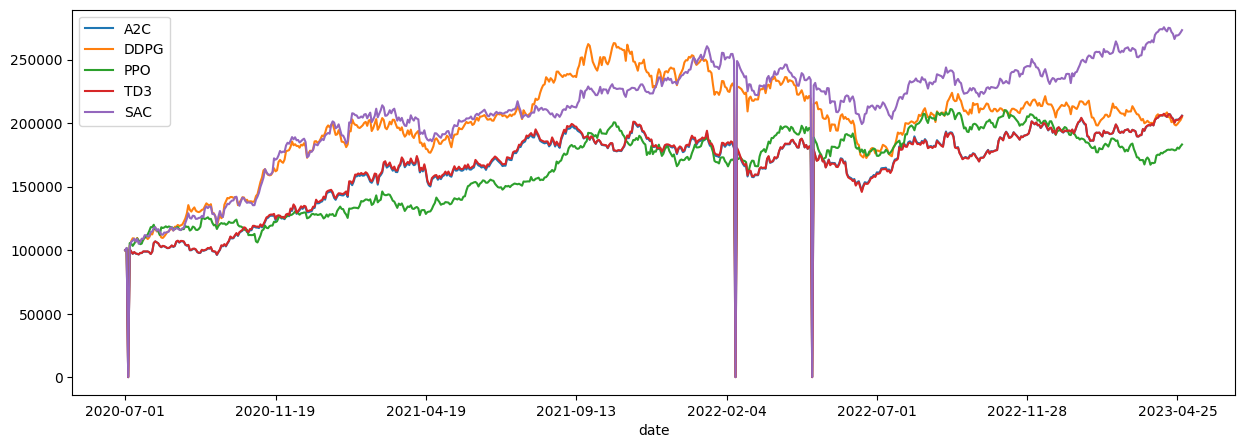

In [65]:
matplotlib.use('Agg')
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()